In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import *
from scipy import stats
from statsmodels.stats.power import ttest_power
from statsmodels.stats.power import TTestIndPower
from statsmodels.stats.power import GofChisquarePower
import statsmodels.stats.power as power
import statsmodels.stats.multitest as multitest
from math import factorial
import itertools
import random

C:\Users\genna\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Номер 1**

Задание: Попробуйте попарно сравнить между собой 4,5,10,20 нормально распределенных
выборок с равным средним и сигмой без использования поправок. Что получилось?
(Сравнение с помощью t-test)
Тоже самое сделайте для ненормально распределенных выборок (можете использовать
Манна Уитни, или другой критерий, если это будет обоснованно).

*1. Сравнение нормально распределенных выборок*

1.1 Случай для 4 выборок

Сделаем множественное сравнение выборок. Число степпеней свободы для каждой пары 10000-2=9998. Уровень значимости можно взять, например, равный 0.05.

In [2]:
e = []

In [3]:
get_colors = lambda n: list(map(lambda i: "#" + "%06x" % random.randint(0, 0xFFFFFF),range(n)))
def ploty(n, m, s, value):
    c = []
    c = get_colors(n)
    if n>=10:
        f= plt.figure(figsize=(15,25))
    else:
        f= plt.figure(figsize=(20,5))
    for i in range(n):
        e.append(np.random.normal(m, s, value))
        if n>=10:
            ax=f.add_subplot(int(n//2), 2, i+1)#работает для четных n
            sns.distplot(e[i],color = c[i], hist = True, kde = False,ax = ax)
            ax.set_title('data'+str(i+1))
        else:
            ax=f.add_subplot(int(str(1)+ str(n) + str(i+1)))
            sns.distplot(e[i],color = c[i], hist = True, kde = False,ax = ax)
            ax.set_title('data'+str(i+1))

C:\Users\genna\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


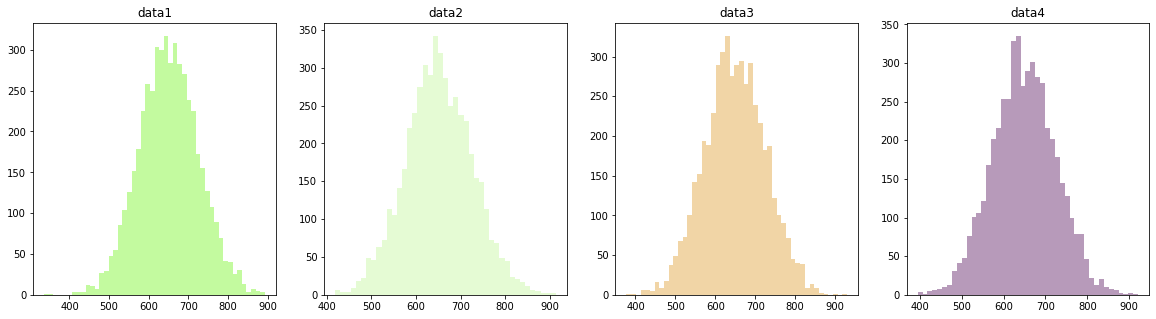

In [4]:
ploty(4,650,75,5000)

In [5]:
def statsign(data):
    n = len(data)
    print(n)
    b = [x+1 for x in range(n)]
    for i, j in zip(itertools.combinations(data, 2), itertools.combinations(b, 2)):
        t, p = stats.ttest_ind(i[0], i[1])
        if p > 0.05:
            print('ex_', j[0],' vs ', 'ex_', j[1], '\nНет статистически значимой разницы','\nt - критерий = ',t,'\np-value =',p)
        else:
            print('ex_', j[0],' vs ', 'ex_', j[1], '\nЕсть статистически значимая разница','\nt - критерий = ',t,'\np-value =',p)
        print('\n')

In [6]:
len(e)

4

In [7]:
statsign(e)

4
ex_ 1  vs  ex_ 2 
Нет статистически значимой разницы 
t - критерий =  -0.6707847081040293 
p-value = 0.5023731854274482


ex_ 1  vs  ex_ 3 
Нет статистически значимой разницы 
t - критерий =  1.1888451722466113 
p-value = 0.23452883413612896


ex_ 1  vs  ex_ 4 
Нет статистически значимой разницы 
t - критерий =  0.8786666658612268 
p-value = 0.3796031534803609


ex_ 2  vs  ex_ 3 
Нет статистически значимой разницы 
t - критерий =  1.857051056040644 
p-value = 0.06333327814932561


ex_ 2  vs  ex_ 4 
Нет статистически значимой разницы 
t - критерий =  1.5460657180921253 
p-value = 0.12212034735423284


ex_ 3  vs  ex_ 4 
Нет статистически значимой разницы 
t - критерий =  -0.30756901888003463 
p-value = 0.7584167039022861




In [8]:
e.clear()

1.2 Случай для 5 выборок

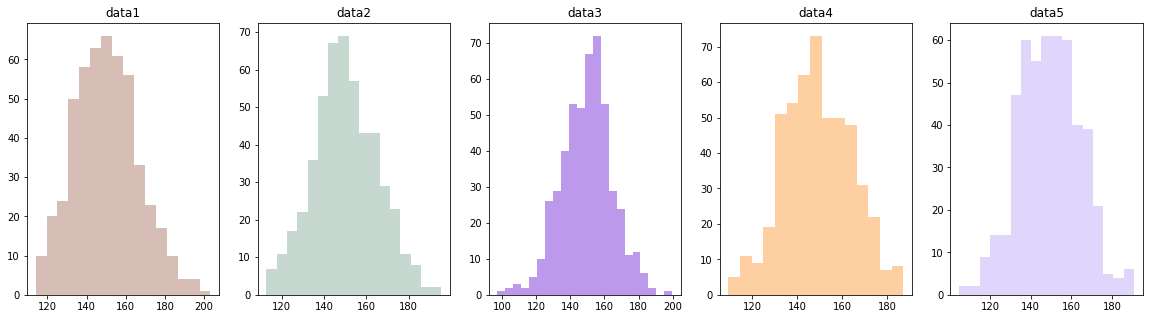

In [9]:
ploty(5,150,15,500)

In [10]:
len(e)

5

In [11]:
statsign(e)

5
ex_ 1  vs  ex_ 2 
Нет статистически значимой разницы 
t - критерий =  -0.06606370171556053 
p-value = 0.9473403407934233


ex_ 1  vs  ex_ 3 
Нет статистически значимой разницы 
t - критерий =  0.6199967804356409 
p-value = 0.5354014380408426


ex_ 1  vs  ex_ 4 
Нет статистически значимой разницы 
t - критерий =  1.0015417509044835 
p-value = 0.31680773411114216


ex_ 1  vs  ex_ 5 
Нет статистически значимой разницы 
t - критерий =  0.8433006925071421 
p-value = 0.399262364971009


ex_ 2  vs  ex_ 3 
Нет статистически значимой разницы 
t - критерий =  0.7139019603330032 
p-value = 0.4754547264627822


ex_ 2  vs  ex_ 4 
Нет статистически значимой разницы 
t - критерий =  1.1095548389938354 
p-value = 0.2674581843943663


ex_ 2  vs  ex_ 5 
Нет статистически значимой разницы 
t - критерий =  0.9454024543437008 
p-value = 0.34468227779618876


ex_ 3  vs  ex_ 4 
Нет статистически значимой разницы 
t - критерий =  0.4041311191492972 
p-value = 0.6862028877445847


ex_ 3  vs  ex_ 5 
Нет стати

In [12]:
e.clear()

1.3 Случай для 10 выборок

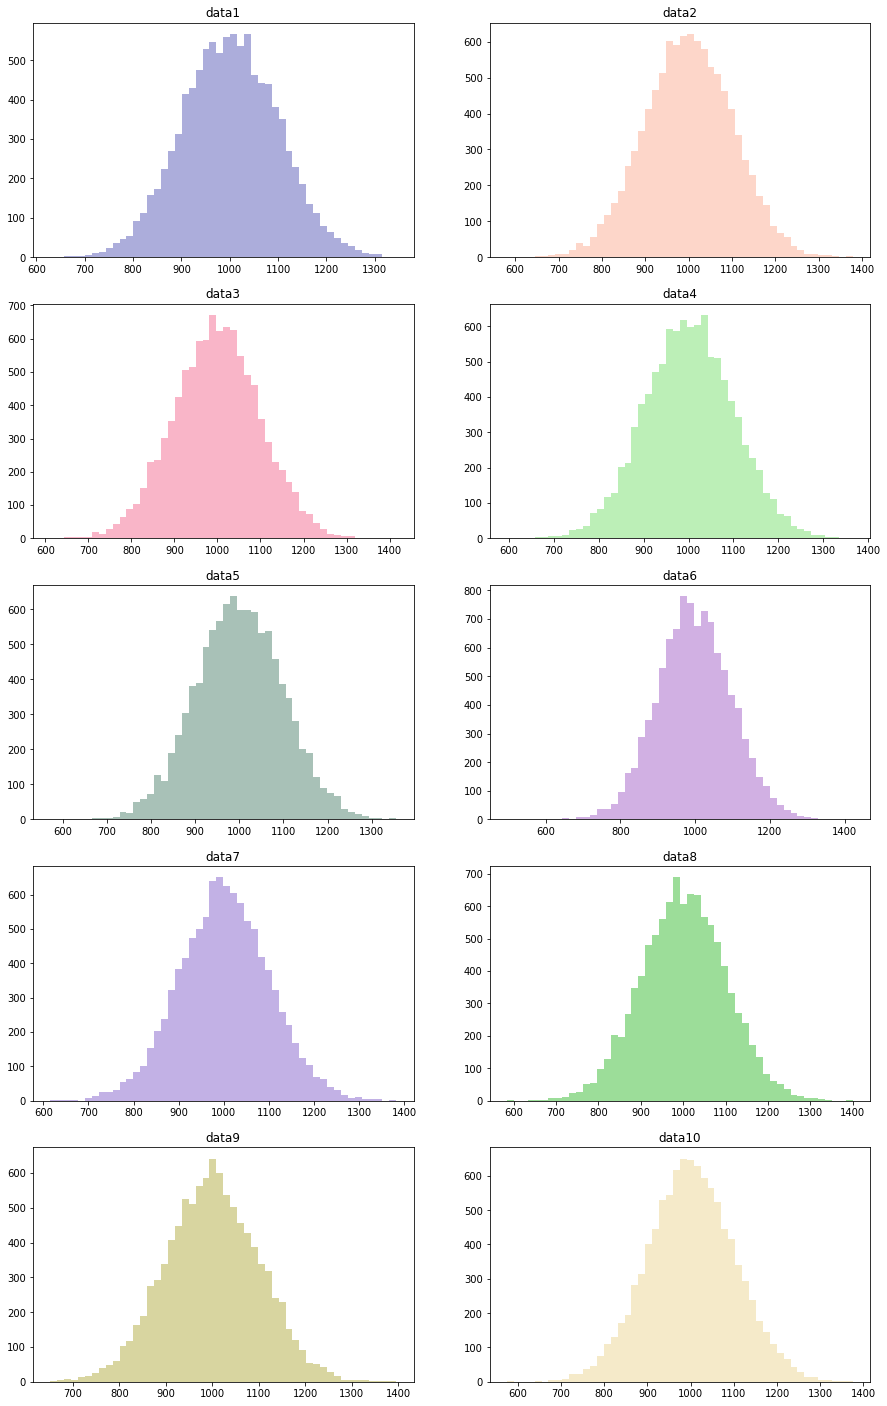

In [13]:
ploty(10,1000,100,10000)

In [14]:
len(e)

10

In [15]:
statsign(e)

10
ex_ 1  vs  ex_ 2 
Нет статистически значимой разницы 
t - критерий =  0.6126193838025655 
p-value = 0.5401350043000656


ex_ 1  vs  ex_ 3 
Нет статистически значимой разницы 
t - критерий =  1.6393333832908827 
p-value = 0.10115957667626775


ex_ 1  vs  ex_ 4 
Нет статистически значимой разницы 
t - критерий =  -0.5510724760558976 
p-value = 0.5815901488753392


ex_ 1  vs  ex_ 5 
Нет статистически значимой разницы 
t - критерий =  0.38153220701956725 
p-value = 0.7028124310068962


ex_ 1  vs  ex_ 6 
Есть статистически значимая разница 
t - критерий =  2.0084251574111343 
p-value = 0.0446115511175627


ex_ 1  vs  ex_ 7 
Нет статистически значимой разницы 
t - критерий =  -0.34723873108704817 
p-value = 0.7284156297881711


ex_ 1  vs  ex_ 8 
Нет статистически значимой разницы 
t - критерий =  -0.14126308988368846 
p-value = 0.8876635300474669


ex_ 1  vs  ex_ 9 
Нет статистически значимой разницы 
t - критерий =  0.3250642284560544 
p-value = 0.7451358620261348


ex_ 1  vs  ex_ 10 
Не

In [16]:
e.clear()

1.4 Случай для 20 выборок

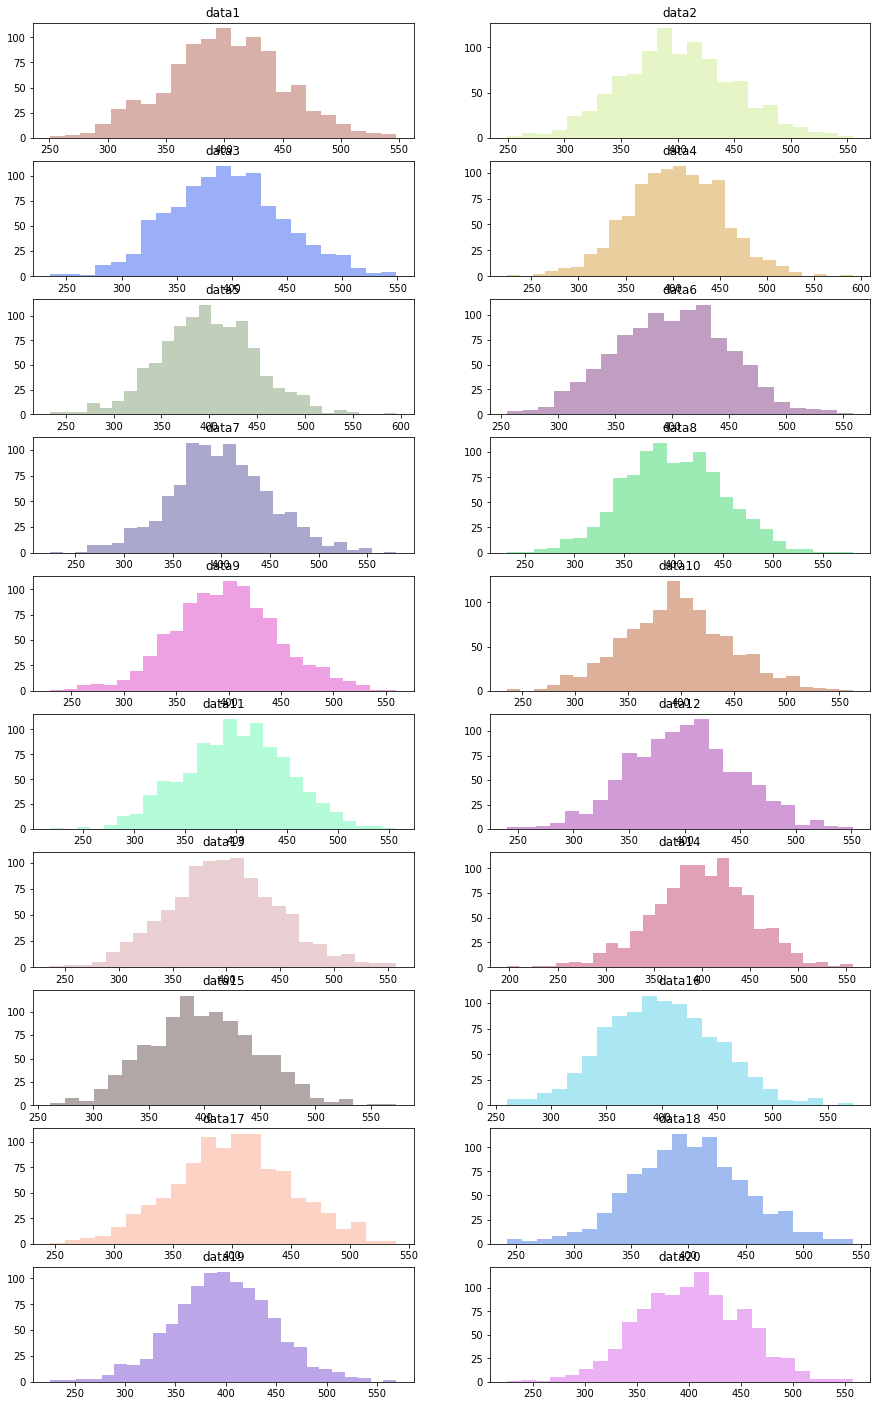

In [17]:
ploty(20,400,50,1000)

In [18]:
len(e)

20

In [19]:
statsign(e)

20
ex_ 1  vs  ex_ 2 
Нет статистически значимой разницы 
t - критерий =  0.13980393642180167 
p-value = 0.8888289939283911


ex_ 1  vs  ex_ 3 
Есть статистически значимая разница 
t - критерий =  2.4681036804828853 
p-value = 0.01366629621813749


ex_ 1  vs  ex_ 4 
Нет статистически значимой разницы 
t - критерий =  -1.214242372327369 
p-value = 0.22479868049442475


ex_ 1  vs  ex_ 5 
Нет статистически значимой разницы 
t - критерий =  0.9731814884994661 
p-value = 0.3305809115449939


ex_ 1  vs  ex_ 6 
Нет статистически значимой разницы 
t - критерий =  0.5708857771999293 
p-value = 0.5681412735906308


ex_ 1  vs  ex_ 7 
Нет статистически значимой разницы 
t - критерий =  0.5739022594431987 
p-value = 0.566098540646693


ex_ 1  vs  ex_ 8 
Нет статистически значимой разницы 
t - критерий =  0.2839334663940771 
p-value = 0.7764907887165983


ex_ 1  vs  ex_ 9 
Нет статистически значимой разницы 
t - критерий =  1.3156452540886985 
p-value = 0.1884440793465752


ex_ 1  vs  ex_ 10 
Есть ст

ex_ 5  vs  ex_ 11 
Нет статистически значимой разницы 
t - критерий =  -0.6951489625016127 
p-value = 0.4870427878790362


ex_ 5  vs  ex_ 12 
Нет статистически значимой разницы 
t - критерий =  -0.3755144008799636 
p-value = 0.7073177995964752


ex_ 5  vs  ex_ 13 
Нет статистически значимой разницы 
t - критерий =  0.11582373575891468 
p-value = 0.9078038780586085


ex_ 5  vs  ex_ 14 
Нет статистически значимой разницы 
t - критерий =  -0.5698726541188994 
p-value = 0.5688281415679461


ex_ 5  vs  ex_ 15 
Нет статистически значимой разницы 
t - критерий =  -0.29513713204650466 
p-value = 0.7679197896712586


ex_ 5  vs  ex_ 16 
Нет статистически значимой разницы 
t - критерий =  -0.3991355436010119 
p-value = 0.6898359897151602


ex_ 5  vs  ex_ 17 
Нет статистически значимой разницы 
t - критерий =  -0.7706594454754996 
p-value = 0.44099993318688757


ex_ 5  vs  ex_ 18 
Нет статистически значимой разницы 
t - критерий =  -0.9110348621122355 
p-value = 0.36238690264035534


ex_ 5  vs  ex

In [20]:
e.clear()

**Вывод.** Мы сгенерировали 4,5,10,20 нормально распределенных выборок с одинаковыми параметрами. Провели t-тест Стьюдента. Это двусторонний тест для нулевой гипотезы о том, что 2 независимые выборки имеют одинаковые средние значения.Получилось, что между данными в большинстве случаев нет стат. значимости (в тех которых это случилось, скорее всего некая 'погрешность'). Это вроде бы сразу ясно, так как во всех выборках мы задали одинаковое матожидание.

*2. Ненормальные выборки. Применение критерия Манна-Уитни*

In [21]:
e = []
get_colors = lambda n: list(map(lambda i: "#" + "%06x" % random.randint(0, 0xFFFFFF),range(n)))
def ploty1(n, l, value):
    c = []
    c = get_colors(n)
    if n>=10:
        f= plt.figure(figsize=(15,25))
    else:
        f= plt.figure(figsize=(20,5))
    for i in range(n):
        e.append(np.random.exponential(l, value))#экспоненциальное распределение
        if n>=10:
            ax=f.add_subplot(int(n//2), 2, i+1)#работает для четных n
            sns.distplot(e[i],color = c[i], hist = True, kde = False,ax = ax)
            ax.set_title('data'+str(i+1))
        else:
            ax=f.add_subplot(int(str(1)+ str(n) + str(i+1)))
            sns.distplot(e[i],color = c[i], hist = True, kde = False,ax = ax)
            ax.set_title('data'+str(i+1))

In [22]:
def statsign1(data):
    n = len(data)
    print(n)
    b = [x+1 for x in range(n)]
    for i, j in zip(itertools.combinations(data, 2), itertools.combinations(b, 2)):
        stat, p_val = stats.mannwhitneyu(i[0],i[1],alternative = 'two-sided')
        if p_val > 0.05:
            print('ex_', j[0],' vs ', 'ex_', j[1], '\nНет статистически значимой разницы','\np-value = ',round(p_val,4),'\nU-критерий =',stat)
        else:
            print('ex_', j[0],' vs ', 'ex_', j[1], '\nЕсть статистически значимая разница','\np-value = ',round(p_val,4),'\nU-критерий =',stat)
        print('\n')

2.1 Случай для 4 выборок

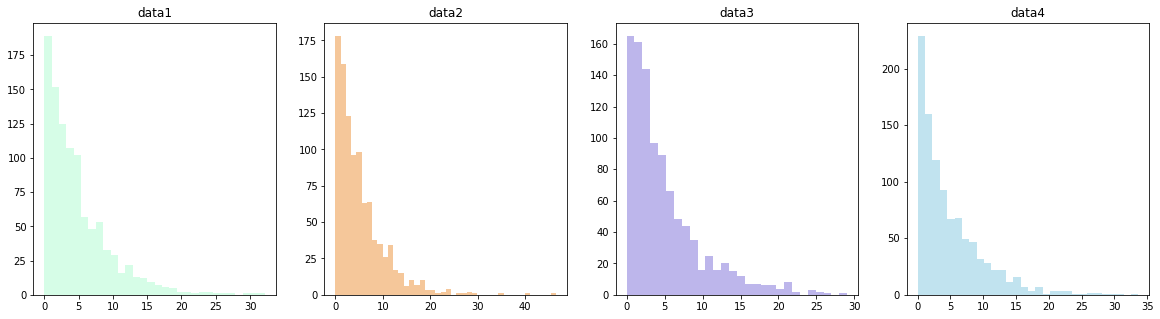

In [23]:
ploty1(4,5,1000)

In [24]:
len(e)

4

In [25]:
statsign1(e)

4
ex_ 1  vs  ex_ 2 
Нет статистически значимой разницы 
p-value =  0.1496 
U-критерий = 481391.0


ex_ 1  vs  ex_ 3 
Нет статистически значимой разницы 
p-value =  0.6996 
U-критерий = 495017.0


ex_ 1  vs  ex_ 4 
Нет статистически значимой разницы 
p-value =  0.6171 
U-критерий = 506456.0


ex_ 2  vs  ex_ 3 
Нет статистически значимой разницы 
p-value =  0.2941 
U-критерий = 513549.0


ex_ 2  vs  ex_ 4 
Нет статистически значимой разницы 
p-value =  0.0613 
U-критерий = 524164.0


ex_ 3  vs  ex_ 4 
Нет статистически значимой разницы 
p-value =  0.3537 
U-критерий = 511977.0




In [26]:
e.clear()

2.2 Случай для 5 выборок

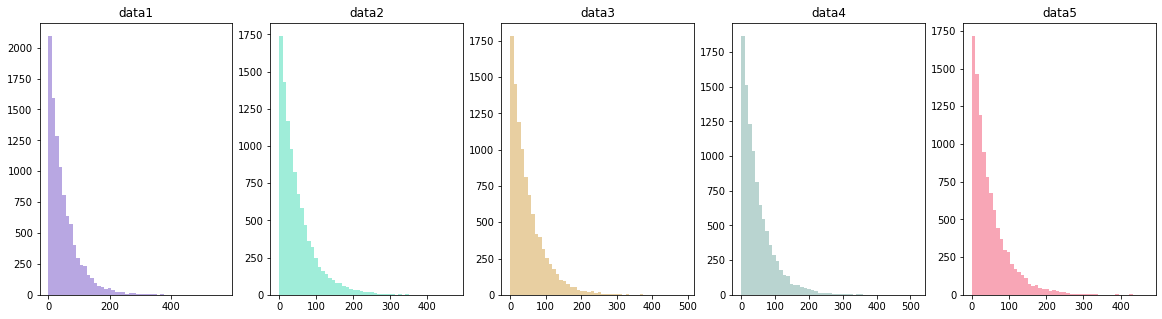

In [27]:
ploty1(5,50,10000)

In [28]:
len(e)

5

In [29]:
statsign1(e)
e.clear()

5
ex_ 1  vs  ex_ 2 
Нет статистически значимой разницы 
p-value =  0.9181 
U-критерий = 50041959.0


ex_ 1  vs  ex_ 3 
Нет статистически значимой разницы 
p-value =  0.6137 
U-критерий = 49793883.0


ex_ 1  vs  ex_ 4 
Нет статистически значимой разницы 
p-value =  0.8844 
U-критерий = 49940620.0


ex_ 1  vs  ex_ 5 
Нет статистически значимой разницы 
p-value =  0.9533 
U-критерий = 50023894.0


ex_ 2  vs  ex_ 3 
Нет статистически значимой разницы 
p-value =  0.5467 
U-критерий = 49753949.0


ex_ 2  vs  ex_ 4 
Нет статистически значимой разницы 
p-value =  0.8036 
U-критерий = 49898472.0


ex_ 2  vs  ex_ 5 
Нет статистически значимой разницы 
p-value =  0.9731 
U-критерий = 49986256.0


ex_ 3  vs  ex_ 4 
Нет статистически значимой разницы 
p-value =  0.7178 
U-критерий = 50147537.0


ex_ 3  vs  ex_ 5 
Нет статистически значимой разницы 
p-value =  0.5787 
U-критерий = 50226727.0


ex_ 4  vs  ex_ 5 
Нет статистически значимой разницы 
p-value =  0.8358 
U-критерий = 50084597.0




2.3 Случай для 10 выборок

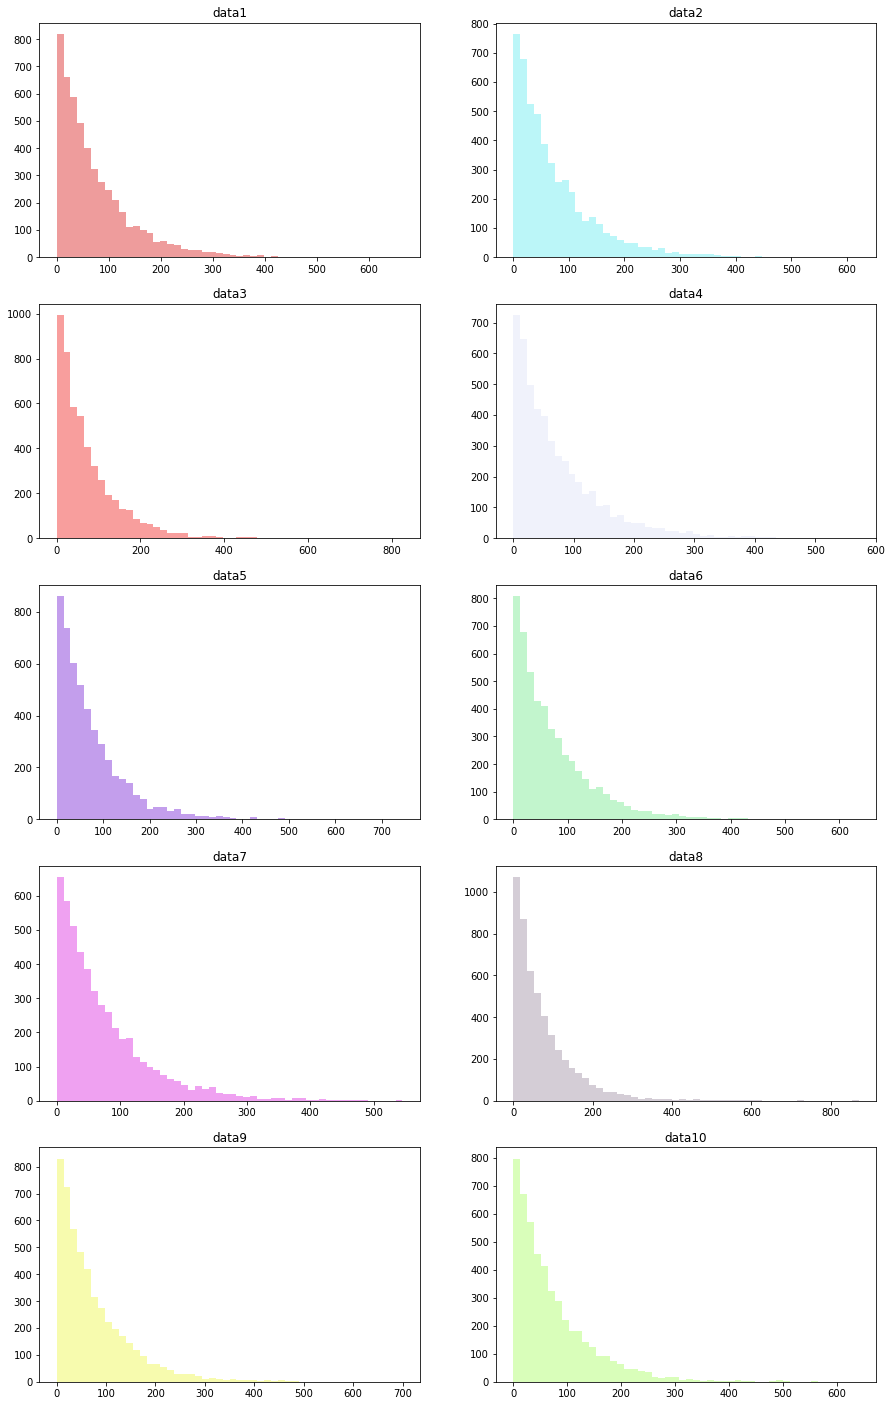

In [30]:
ploty1(10,75,5000)

In [31]:
len(e)

10

In [32]:
statsign1(e)
e.clear()

10
ex_ 1  vs  ex_ 2 
Нет статистически значимой разницы 
p-value =  0.663 
U-критерий = 12562904.0


ex_ 1  vs  ex_ 3 
Нет статистически значимой разницы 
p-value =  0.9475 
U-критерий = 12509504.0


ex_ 1  vs  ex_ 4 
Нет статистически значимой разницы 
p-value =  0.88 
U-критерий = 12521798.0


ex_ 1  vs  ex_ 5 
Нет статистически значимой разницы 
p-value =  0.4774 
U-критерий = 12397455.0


ex_ 1  vs  ex_ 6 
Нет статистически значимой разницы 
p-value =  0.7807 
U-критерий = 12540183.0


ex_ 1  vs  ex_ 7 
Нет статистически значимой разницы 
p-value =  0.6242 
U-критерий = 12429284.0


ex_ 1  vs  ex_ 8 
Нет статистически значимой разницы 
p-value =  0.2706 
U-критерий = 12659021.0


ex_ 1  vs  ex_ 9 
Нет статистически значимой разницы 
p-value =  0.4926 
U-критерий = 12400942.0


ex_ 1  vs  ex_ 10 
Нет статистически значимой разницы 
p-value =  0.7267 
U-критерий = 12550444.0


ex_ 2  vs  ex_ 3 
Нет статистически значимой разницы 
p-value =  0.7164 
U-критерий = 12447570.0


ex_ 2  vs

2.4 Случай для 20 выборок

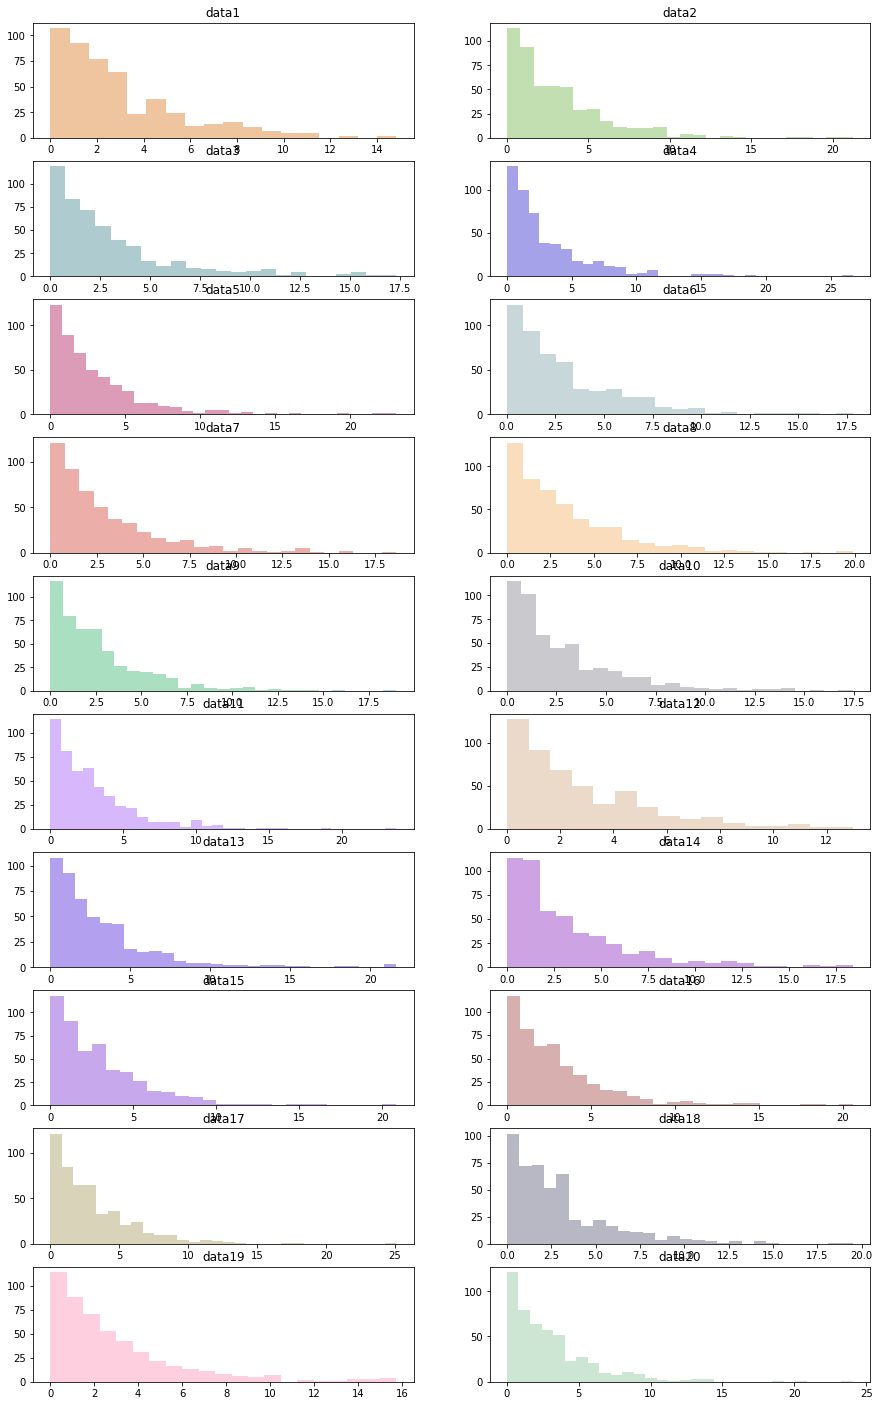

In [33]:
ploty1(20,3,500)

In [34]:
len(e)

20

In [35]:
statsign1(e)
e.clear()

20
ex_ 1  vs  ex_ 2 
Нет статистически значимой разницы 
p-value =  0.8719 
U-критерий = 124263.0


ex_ 1  vs  ex_ 3 
Нет статистически значимой разницы 
p-value =  0.2669 
U-критерий = 130070.0


ex_ 1  vs  ex_ 4 
Нет статистически значимой разницы 
p-value =  0.3561 
U-критерий = 129215.0


ex_ 1  vs  ex_ 5 
Нет статистически значимой разницы 
p-value =  0.3577 
U-критерий = 129201.0


ex_ 1  vs  ex_ 6 
Нет статистически значимой разницы 
p-value =  0.6335 
U-критерий = 127178.0


ex_ 1  vs  ex_ 7 
Нет статистически значимой разницы 
p-value =  0.2617 
U-критерий = 130126.0


ex_ 1  vs  ex_ 8 
Нет статистически значимой разницы 
p-value =  0.3665 
U-критерий = 120876.0


ex_ 1  vs  ex_ 9 
Нет статистически значимой разницы 
p-value =  0.0836 
U-критерий = 132902.0


ex_ 1  vs  ex_ 10 
Нет статистически значимой разницы 
p-value =  0.0704 
U-критерий = 133262.0


ex_ 1  vs  ex_ 11 
Нет статистически значимой разницы 
p-value =  0.5674 
U-критерий = 127612.0


ex_ 1  vs  ex_ 12 
Нет ст

ex_ 6  vs  ex_ 9 
Нет статистически значимой разницы 
p-value =  0.2212 
U-критерий = 130587.0


ex_ 6  vs  ex_ 10 
Нет статистически значимой разницы 
p-value =  0.1939 
U-критерий = 130933.0


ex_ 6  vs  ex_ 11 
Нет статистически значимой разницы 
p-value =  0.9456 
U-критерий = 125312.0


ex_ 6  vs  ex_ 12 
Нет статистически значимой разницы 
p-value =  0.5646 
U-критерий = 127631.0


ex_ 6  vs  ex_ 13 
Нет статистически значимой разницы 
p-value =  0.795 
U-критерий = 123813.0


ex_ 6  vs  ex_ 14 
Нет статистически значимой разницы 
p-value =  0.4657 
U-критерий = 121668.0


ex_ 6  vs  ex_ 15 
Нет статистически значимой разницы 
p-value =  0.5897 
U-критерий = 122537.0


ex_ 6  vs  ex_ 16 
Нет статистически значимой разницы 
p-value =  0.844 
U-критерий = 124101.0


ex_ 6  vs  ex_ 17 
Нет статистически значимой разницы 
p-value =  0.612 
U-критерий = 122683.0


ex_ 6  vs  ex_ 18 
Нет статистически значимой разницы 
p-value =  0.9978 
U-критерий = 124987.0


ex_ 6  vs  ex_ 19 
Нет с

ex_ 18  vs  ex_ 19 
Нет статистически значимой разницы 
p-value =  0.5799 
U-критерий = 127528.0


ex_ 18  vs  ex_ 20 
Нет статистически значимой разницы 
p-value =  0.6257 
U-критерий = 122772.0


ex_ 19  vs  ex_ 20 
Нет статистически значимой разницы 
p-value =  0.3172 
U-критерий = 120432.0




**Вывод.** Мы сгенерировали 4,5,10,20 экспоненциально распределенных выборок с одинаковыми параметрами. Применили U-критерий Манна — Уитни. Так же получилось, что между данными в большинстве случаев нет стат. значимости. На это также повлияло, что мы сравнивали выборки с одинаковыми параметрами.

**Номер 2**

Сравните больше 10 выборок с неравными средними и сигмой между собой, используя
поправку Бонферрони (разницу можете пробовать любую, от небольшой до реально
большого различия). Что получилось? А теперь сравните результат со сравнением того
же числа выборок, но используя поправку Холма - Бонферрони.
Можете использовать любые библиотеки.

In [36]:
ex_1 = np.random.logistic(1000,100,1000)
ex_2 = np.random.logistic(100,1,1000)
ex_3 = np.random.logistic(200,250,1000)
ex_4 = np.random.logistic(900,70,1000)
ex_5 = np.random.logistic(450,10,1000)
ex_6 = np.random.logistic(750,115,1000)
ex_7 = np.random.logistic(250,25,1000)
ex_8 = np.random.logistic(115,75,1000)
ex_9 = np.random.logistic(190,558,1000)
ex_10 = np.random.logistic(50,5,1000)
ex_11 = np.random.logistic(175,40,1000)
ex_12 = np.random.logistic(800,60,1000)

Text(0.5, 1.0, 'data12')

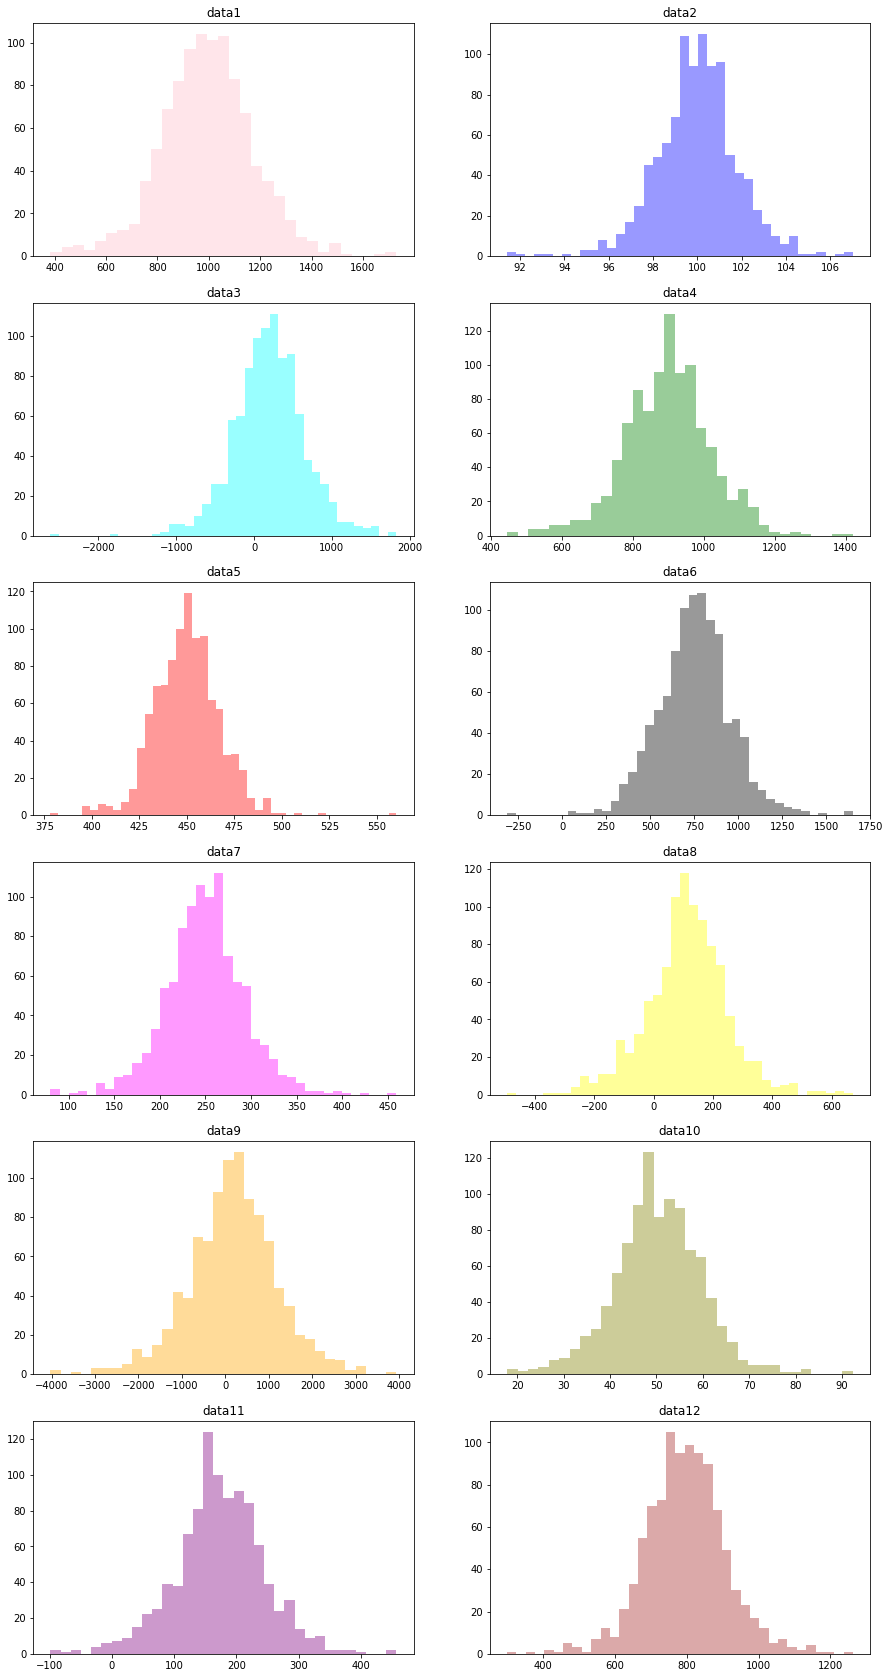

In [37]:
f= plt.figure(figsize=(15,30))

ax=f.add_subplot(6,2,1)
sns.distplot(ex_1,color = 'pink',hist = True, kde = False,ax = ax)
ax.set_title('data1')

ax=f.add_subplot(6,2,2)
sns.distplot(ex_2,color = 'blue',hist = True, kde = False,ax=ax)
ax.set_title('data2')

ax=f.add_subplot(6,2,3)
sns.distplot(ex_3,color = 'cyan',hist = True, kde = False,ax = ax)
ax.set_title('data3')

ax=f.add_subplot(6,2,4)
sns.distplot(ex_4,color = 'green',hist = True, kde = False,ax=ax)
ax.set_title('data4')

ax=f.add_subplot(6,2,5)
sns.distplot(ex_5,color = 'red',hist = True, kde = False,ax = ax)
ax.set_title('data5')

ax=f.add_subplot(6,2,6)
sns.distplot(ex_6,color = 'black',hist = True, kde = False,ax=ax)
ax.set_title('data6')

ax=f.add_subplot(6,2,7)
sns.distplot(ex_7,color = 'magenta',hist = True, kde = False,ax = ax)
ax.set_title('data7')

ax=f.add_subplot(6,2,8)
sns.distplot(ex_8,color = 'yellow',hist = True, kde = False,ax=ax)
ax.set_title('data8')

ax=f.add_subplot(6,2,9)
sns.distplot(ex_9,color = 'orange',hist = True, kde = False,ax = ax)
ax.set_title('data9')

ax=f.add_subplot(6,2,10)
sns.distplot(ex_10,color = 'olive',hist = True, kde = False,ax=ax)
ax.set_title('data10')

ax=f.add_subplot(6,2,11)
sns.distplot(ex_11,color = 'purple',hist = True, kde = False,ax = ax)
ax.set_title('data11')

ax=f.add_subplot(6,2,12)
sns.distplot(ex_12,color = 'brown',hist = True, kde = False,ax=ax)
ax.set_title('data12')

*Поправка Бонферрони.* Применяем критерий Краскела — Уоллиса

In [38]:
def statsign2(*args):
    n = len(args)
    print(n)
    a = int(factorial(n)/(factorial(n-2)*2))#равно 66 так как 12 выборок
    b = [x+1 for x in range(n)]
    for i, j in zip(itertools.combinations(args, 2), itertools.combinations(b, 2)):
        w, p_val = stats.kruskal(i[0],i[1])
        if p_val  > 0.05/a:
            print('ex_', j[0],' vs ', 'ex_', j[1], '\nНет статистически значимой разницы','\np-value = ',p_val ,'\nH stat =',w)
        else:
            print('ex_', j[0],' vs ', 'ex_', j[1], '\nЕсть статистически значимая разница','\np-value = ',p_val ,'\nH stat =',w)
        print('\n')

In [39]:
statsign2(ex_1, ex_2, ex_3, ex_4, ex_5, ex_6, ex_7, ex_8, ex_9, ex_10, ex_11, ex_12)

12
ex_ 1  vs  ex_ 2 
Есть статистически значимая разница 
p-value =  0.0 
H stat = 1499.2503748125928


ex_ 1  vs  ex_ 3 
Есть статистически значимая разница 
p-value =  3.952027595541699e-263 
H stat = 1200.8672573853064


ex_ 1  vs  ex_ 4 
Есть статистически значимая разница 
p-value =  2.50447020159632e-43 
H stat = 190.4746957961015


ex_ 1  vs  ex_ 5 
Есть статистически значимая разница 
p-value =  0.0 
H stat = 1478.8286410134924


ex_ 1  vs  ex_ 6 
Есть статистически значимая разница 
p-value =  1.5284213772185578e-136 
H stat = 618.5724571214387


ex_ 1  vs  ex_ 7 
Есть статистически значимая разница 
p-value =  0.0 
H stat = 1499.166417967017


ex_ 1  vs  ex_ 8 
Есть статистически значимая разница 
p-value =  0.0 
H stat = 1497.913341703149


ex_ 1  vs  ex_ 9 
Есть статистически значимая разница 
p-value =  9.354381842691085e-126 
H stat = 568.9808244917531


ex_ 1  vs  ex_ 10 
Есть статистически значимая разница 
p-value =  0.0 
H stat = 1499.2503748125928


ex_ 1  vs  ex_ 11

**Вывод.** Я сгенерировал 12 логистически распределенных выборок с разными параметрами. Использовал критерий Краскела — Уоллиса. Применил поправку Бонферрони. Получилось, что между данными в большинстве случаев присутствует стат. значимость.

*Поправка Холма-Бонферрони.* Применяем критерий Краскела — Уоллиса

In [40]:
pvals = []
def pp(*args):
    n = len(args)
    b = [x+1 for x in range(n)]
    for i, j in zip(itertools.combinations(args, 2), itertools.combinations(b, 2)):
        pvals.append((stats.kruskal(i[0],i[1]))[1])

In [41]:
pp(ex_1, ex_2, ex_3, ex_4, ex_5, ex_6, ex_7, ex_8, ex_9, ex_10, ex_11, ex_12)

In [42]:
sort_values = sorted(pvals)

Как на лекции

In [43]:
def Holm_Bonferroni(data):
    for i in data:
        if i < 0.05/(len(data) - (data.index(i) + 1) + 1):
            print ('Не можем  принять гипотезу H0','\ncorrected_alpha=',0.05/(len(data) - (data.index(i) + 1) + 1),
                   '\np_value = ',i)
        else:
            print('Не можем отклонить гипотезу H0','\ncorrected_alpha=',0.05/(len(data) - (data.index(i) + 1) + 1),
                 '\np_value = ',i)
        print('\n')

In [44]:
Holm_Bonferroni(sort_values)

Не можем  принять гипотезу H0 
corrected_alpha= 0.0007575757575757576 
p_value =  0.0


Не можем  принять гипотезу H0 
corrected_alpha= 0.0007575757575757576 
p_value =  0.0


Не можем  принять гипотезу H0 
corrected_alpha= 0.0007575757575757576 
p_value =  0.0


Не можем  принять гипотезу H0 
corrected_alpha= 0.0007575757575757576 
p_value =  0.0


Не можем  принять гипотезу H0 
corrected_alpha= 0.0007575757575757576 
p_value =  0.0


Не можем  принять гипотезу H0 
corrected_alpha= 0.0007575757575757576 
p_value =  0.0


Не можем  принять гипотезу H0 
corrected_alpha= 0.0007575757575757576 
p_value =  0.0


Не можем  принять гипотезу H0 
corrected_alpha= 0.0007575757575757576 
p_value =  0.0


Не можем  принять гипотезу H0 
corrected_alpha= 0.0007575757575757576 
p_value =  0.0


Не можем  принять гипотезу H0 
corrected_alpha= 0.0007575757575757576 
p_value =  0.0


Не можем  принять гипотезу H0 
corrected_alpha= 0.0007575757575757576 
p_value =  0.0


Не можем  принять гипотезу H0 
c

Применение библиотеки scipy

In [45]:
from statsmodels.stats.multitest import multipletests#использование scipy
B, correct_p_value, a1, a2 = multipletests(sort_values, alpha=0.05, method='holm', is_sorted=False, returnsorted=False)
n = 12# 12 выборок
a = int(factorial(n)/(factorial(n-2)*2))
for i in range(a):
    if B[i] == True:
        print ('Не можем  принять гипотезу H0','\ncorrected_p=',correct_p_value[i], '\np=', sort_values[i])
    else:
        print ('Не можем  отклонить гипотезу H0','\ncorrected_p=',correct_p_value[i], '\np=', sort_values[i])
    print('\n')

Не можем  принять гипотезу H0 
corrected_p= 0.0 
p= 0.0


Не можем  принять гипотезу H0 
corrected_p= 0.0 
p= 0.0


Не можем  принять гипотезу H0 
corrected_p= 0.0 
p= 0.0


Не можем  принять гипотезу H0 
corrected_p= 0.0 
p= 0.0


Не можем  принять гипотезу H0 
corrected_p= 0.0 
p= 0.0


Не можем  принять гипотезу H0 
corrected_p= 0.0 
p= 0.0


Не можем  принять гипотезу H0 
corrected_p= 0.0 
p= 0.0


Не можем  принять гипотезу H0 
corrected_p= 0.0 
p= 0.0


Не можем  принять гипотезу H0 
corrected_p= 0.0 
p= 0.0


Не можем  принять гипотезу H0 
corrected_p= 0.0 
p= 0.0


Не можем  принять гипотезу H0 
corrected_p= 0.0 
p= 0.0


Не можем  принять гипотезу H0 
corrected_p= 0.0 
p= 0.0


Не можем  принять гипотезу H0 
corrected_p= 0.0 
p= 0.0


Не можем  принять гипотезу H0 
corrected_p= 0.0 
p= 0.0


Не можем  принять гипотезу H0 
corrected_p= 0.0 
p= 0.0


Не можем  принять гипотезу H0 
corrected_p= 0.0 
p= 0.0


Не можем  принять гипотезу H0 
corrected_p= 0.0 
p= 0.0


Не можем  прин

**Вывод.** Теперь применил поправку Холма-Бонферрони. Также применил функцию для поправки полученную на лекции и библиотечную функцию. Получилось, что между данными в большинстве случаев присутствует стат. значимость. По сравнению с поправкой Бонферрони получилось меньшее количество принятий гипотезы H0(всего 5), а в Бонферрони 6 принятий гипотезы H0. Я думаю это все-таки зависит от выбора стат критерия и выборок.